In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
palette = sns.color_palette("Spectral", n_colors=13) 
sns.set_theme(context='notebook', palette=palette, style='darkgrid')
rs = 58

In [8]:
#loading the data set
filepath="./data.csv"
data=pd.read_csv(filepath)

In [9]:
#displaying the first 5 rows of the data set
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [15]:
#getting the dimension of the data
print("The dimension of the data set is: (Rows , Column) ", data.shape , "\n")
#column names and data types
print("The column names and data types are:\n",data.dtypes)

The dimension of the data set is: (Rows , Column)  (891, 12) 

The column names and data types are:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### Based on the above discription 
1. Name can be dropped : See no point of having name as a feature
2. PassengerId can be dropepd or retained but should not be used in traing at all
3. Sex : needs to be encoded M - 0 F - 1
4. Ticket : need to understand how ticket can be used
5. Cabin : need to understand how cabin can be used
6. Embarked needs to be encoded C = Cherbourg - 0  , Q = Queenstown - 1 , S = Southhampton - 2

In [16]:
#checking for duplicates
print("Number of duplicates in the data set: ", data.duplicated().sum())

Number of duplicates in the data set:  0


In [22]:
#checking for missing values
print("Total number of missing values in the data set:\n\n", data.isnull().sum())

Total number of missing values in the data set:

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Data imputation based on the above outputs
1. Age is a valid integer number :  can find the distribution pattern and then do data imputation 
2. Cabin has too many missing value ~ 77% can not be imputed or will cause false positive and wrong decisions (will drop)
3. Embarked is fairly negligible can use the mean of the data to impute

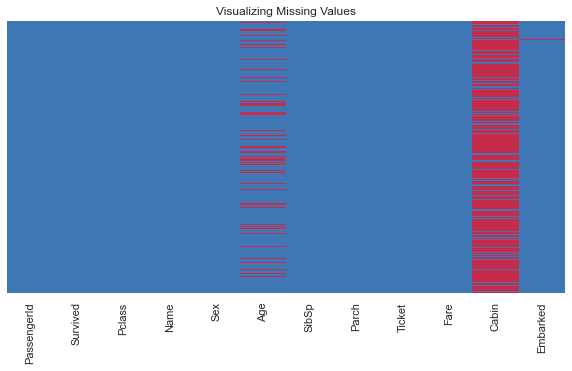

In [27]:
#visualizing the missing values
plt.figure(figsize=(10,5))
plt.title("Visualizing Missing Values")
sns.heatmap(data.isnull(), cbar=False, cmap=sns.color_palette("Spectral_r", n_colors=13), yticklabels=False);